# Assignment 4(due on 12/06)

## Student:朱昱光（12332329），Gtihub：zhu-svg
## 批改人：吴昊天


## 得分：31/30

### 第一题

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
usgs_earthquakes=pd.read_csv("usgs_earthquakes.csv")

In [3]:
usgs_earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [4]:
sorted_earthquakes = usgs_earthquakes.sort_values(by='mag', ascending=False)
top_earthquakes = sorted_earthquakes.head(50)

# 获取第50位的震级
min_mag_in_top = top_earthquakes.iloc[-1]['mag']

# 找到所有震级至少等于这个值的地震
top_earthquakes_extended = sorted_earthquakes[sorted_earthquakes['mag'] >= min_mag_in_top]
top_earthquakes_extended

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
33537,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
95913,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
31850,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
34318,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
106285,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


d:\software\anaconda\envs\TA\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


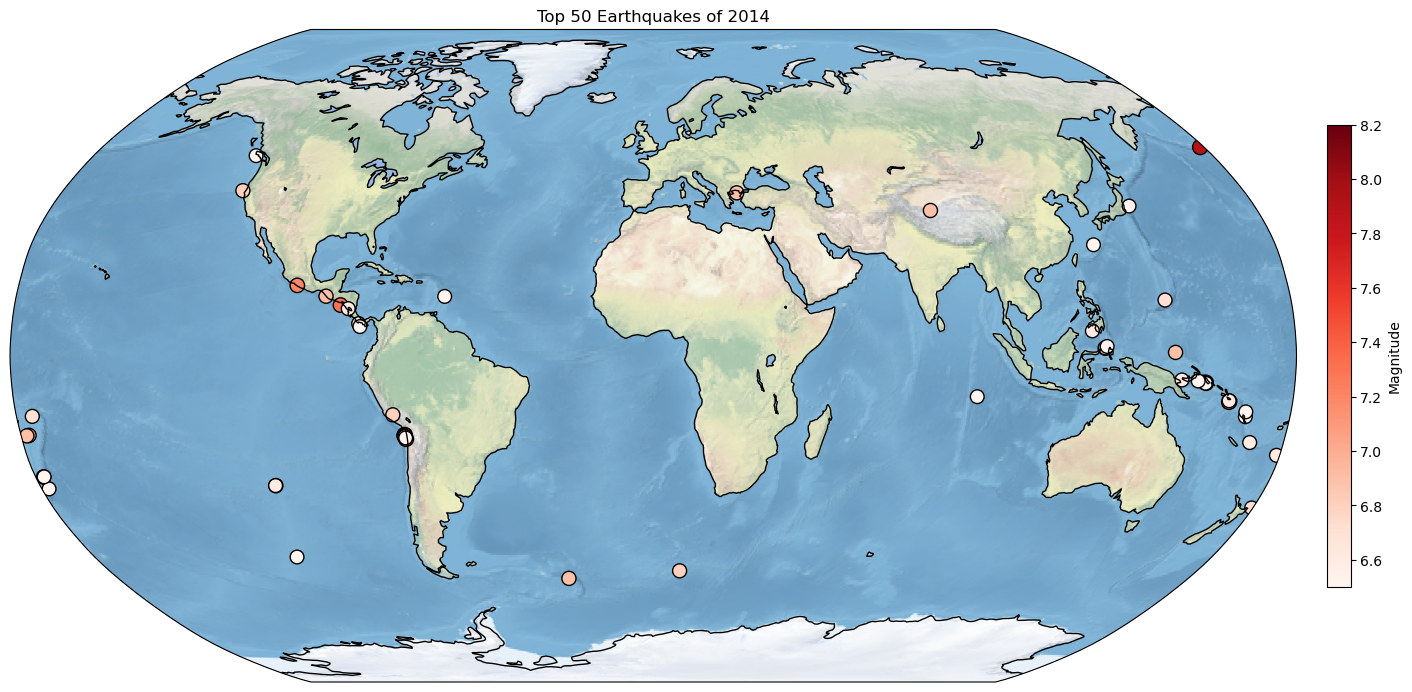

In [5]:
# 设置画布和图坐标系，并添加世界地图背景
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.Robinson()})
ax.set_global()
ax.stock_img()
# 设置全局视图

# 给地图添加特征
ax.add_feature(cfeature.COASTLINE)  # 添加海岸线
ax.add_feature(cfeature.LAND, edgecolor='black')  # 添加陆地，设置边缘颜色为黑色
ax.add_feature(cfeature.LAKES, edgecolor='black')  # 添加湖泊，设置边缘颜色为黑色
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor=cfeature.COLORS['water'])  # 添加海洋，设置边缘颜色为黑色，填充颜色为水蓝色


# 绘制地震点

sc = ax.scatter(top_earthquakes_extended['longitude'], top_earthquakes_extended['latitude'],
                c=top_earthquakes_extended['mag'], cmap='Reds',marker='o', s=top_earthquakes_extended['mag']*15,
                alpha=1, edgecolors='black', transform=ccrs.Geodetic())

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, shrink=0.6)
cbar.set_label('Magnitude')

# 添加标题
plt.title('Top 50 Earthquakes of 2014')

# 显示图像
plt.show()

### 第一题代码运行正常，图件正确。
### 得分：10/10
### --------------------------------------------------------------------------------------------

### 第二题

In [6]:
import netCDF4
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

In [7]:
filenames_2 = [
    'GLDAS_NOAH10_M_EP.A202309.021.nc4',
    'GLDAS_NOAH10_M_EP.A202310.021.nc4',
    
]

In [8]:
ds_2 = xr.open_mfdataset(filenames_2, combine='by_coords')
ds_2

<xarray.Dataset>
Dimensions:                (lat: 150, lon: 360, time: 2, bnds: 2)
Coordinates:
  * lat                    (lat) float32 -59.5 -58.5 -57.5 ... 87.5 88.5 89.5
  * lon                    (lon) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
  * time                   (time) datetime64[ns] 2023-09-01 2023-10-01
Dimensions without coordinates: bnds
Data variables: (12/37)
    time_bnds              (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Swnet_tavg             (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Lwnet_tavg             (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qle_tavg               (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qh_tavg                (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qg_tavg                (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    ...                     ...
    Rainf_f_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Tair_f_inst            (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qair_f_inst            (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Psurf_f_inst           (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    SWdown_f_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    LWdown_f_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
Attributes: (12/16)
    missing_value:          -9999.0
    tavg definition::       past 3-hour average
    acc definition::        past 3-hour accumulation
    inst definition::       instantaneous
    title:                  GLDAS2.1 LIS land surface model output monthly mean
    institution:            NASA GSFC
    ...                     ...
    comment:                website: https://ldas.gsfc.nasa.gov/gldas, https:...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.5
    SOUTH_WEST_CORNER_LON:  -179.5
    DX:                     1.0
    DY:                     1.0

In [9]:
ds_2


<xarray.Dataset>
Dimensions:                (lat: 150, lon: 360, time: 2, bnds: 2)
Coordinates:
  * lat                    (lat) float32 -59.5 -58.5 -57.5 ... 87.5 88.5 89.5
  * lon                    (lon) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
  * time                   (time) datetime64[ns] 2023-09-01 2023-10-01
Dimensions without coordinates: bnds
Data variables: (12/37)
    time_bnds              (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Swnet_tavg             (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Lwnet_tavg             (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qle_tavg               (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qh_tavg                (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qg_tavg                (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    ...                     ...
    Rainf_f_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Tair_f_inst            (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qair_f_inst            (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Psurf_f_inst           (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    SWdown_f_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    LWdown_f_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
Attributes: (12/16)
    missing_value:          -9999.0
    tavg definition::       past 3-hour average
    acc definition::        past 3-hour accumulation
    inst definition::       instantaneous
    title:                  GLDAS2.1 LIS land surface model output monthly mean
    institution:            NASA GSFC
    ...                     ...
    comment:                website: https://ldas.gsfc.nasa.gov/gldas, https:...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.5
    SOUTH_WEST_CORNER_LON:  -179.5
    DX:                     1.0
    DY:                     1.0

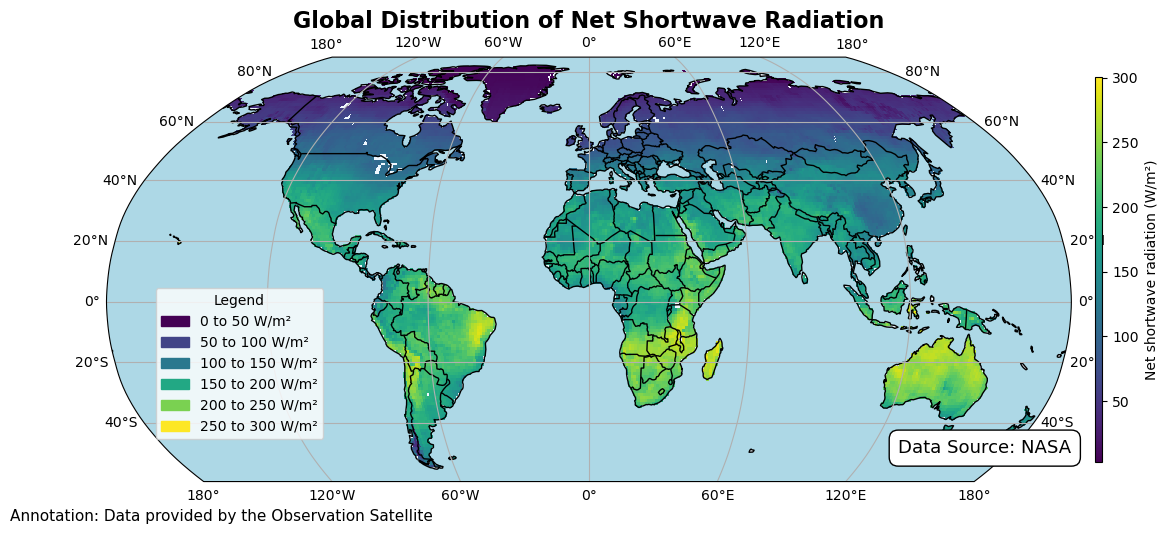

In [10]:
# 想绘制时间维度上的平均值
swnet = ds_2['Swnet_tavg'].mean(dim='time')

# 创建图形和地图投影的轴
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Robinson())  # 使用Robinson投影

# 绘制数据
swnet_plot = swnet.plot(ax=ax, transform=ccrs.PlateCarree(),
                        cmap='viridis',  # 更改为你喜欢的颜色映射
                        add_colorbar=False)

# 添加海岸线、边界以及陆地和海洋的颜色
ax.coastlines(resolution='110m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='aliceblue')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')



# 添加网格线
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 添加颜色条
cbar = fig.colorbar(swnet_plot, ax=ax, orientation='vertical', pad=0.02, aspect=50, shrink=0.5)
cbar.set_label('Net shortwave radiation (W/m²)')


# 根据您的颜色条范围创建颜色
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, 6))

# 创建自定义颜色块用于图例项
legend_elements = [
    mpatches.Patch(color=colors[0], label='0 to 50 W/m²'),
    mpatches.Patch(color=colors[1], label='50 to 100 W/m²'),
    mpatches.Patch(color=colors[2], label='100 to 150 W/m²'),
    mpatches.Patch(color=colors[3], label='150 to 200 W/m²'),
    mpatches.Patch(color=colors[4], label='200 to 250 W/m²'),
    mpatches.Patch(color=colors[5], label='250 to 300 W/m²')
]



# 添加图例
ax.legend(handles=legend_elements, loc=(0.051, 0.1), title='Legend')


# 添加标题
plt.title('Global Distribution of Net Shortwave Radiation', fontsize=16, weight='bold')

# 添加注释
ax.annotate('Annotation: Data provided by the Observation Satellite', xy=(-0.1, -0.1), xycoords='axes fraction',
            ha='left', va='bottom', fontsize=11, color='black')

# 添加文本框
text_box = ax.text(1, 0.1, 'Data Source: NASA', transform=ax.transAxes,
                   ha='right', va='top', fontsize=13,bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))



# 显示图形
plt.show()

In [11]:
import netCDF4
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [12]:
filenames_2 = [
    'GLDAS_NOAH10_M_EP.A202309.021.nc4',
    'GLDAS_NOAH10_M_EP.A202310.021.nc4',
    
]

In [13]:
ds_2 = xr.open_mfdataset(filenames_2, combine='by_coords')
ds_2

<xarray.Dataset>
Dimensions:                (lat: 150, lon: 360, time: 2, bnds: 2)
Coordinates:
  * lat                    (lat) float32 -59.5 -58.5 -57.5 ... 87.5 88.5 89.5
  * lon                    (lon) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
  * time                   (time) datetime64[ns] 2023-09-01 2023-10-01
Dimensions without coordinates: bnds
Data variables: (12/37)
    time_bnds              (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Swnet_tavg             (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Lwnet_tavg             (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qle_tavg               (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qh_tavg                (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qg_tavg                (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    ...                     ...
    Rainf_f_tavg           (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Tair_f_inst            (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Qair_f_inst            (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    Psurf_f_inst           (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    SWdown_f_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
    LWdown_f_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 150, 360), meta=np.ndarray>
Attributes: (12/16)
    missing_value:          -9999.0
    tavg definition::       past 3-hour average
    acc definition::        past 3-hour accumulation
    inst definition::       instantaneous
    title:                  GLDAS2.1 LIS land surface model output monthly mean
    institution:            NASA GSFC
    ...                     ...
    comment:                website: https://ldas.gsfc.nasa.gov/gldas, https:...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.5
    SOUTH_WEST_CORNER_LON:  -179.5
    DX:                     1.0
    DY:                     1.0

d:\software\anaconda\envs\TA\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
d:\software\anaconda\envs\TA\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
d:\software\anaconda\envs\TA\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


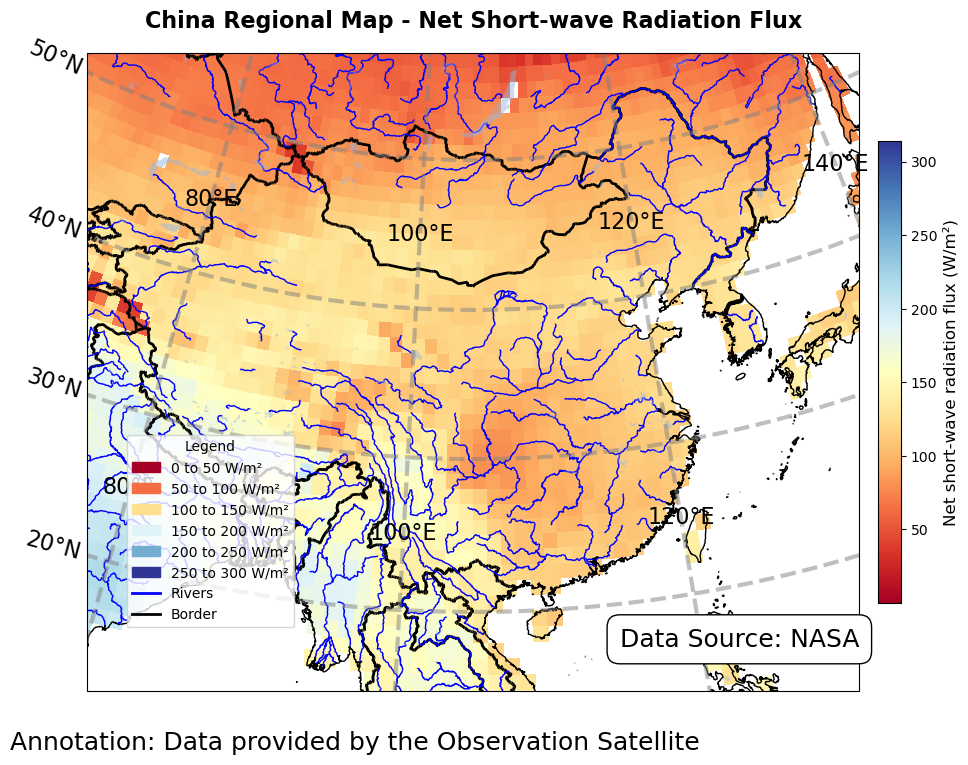

In [14]:
data_to_plot = ds_2['Swnet_tavg'].isel(time=-1)

# 设置地图投影
projection = ccrs.LambertConformal(central_longitude=105, central_latitude=35)

# 创建画布
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': projection})

# 设置显示范围
ax.set_extent([80, 130, 15, 55], crs=ccrs.PlateCarree())

# 添加高分辨率的地图特征
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1)

# 加粗中国的边界
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle='-', linewidth=2)  # Increase the linewidth here
ax.add_feature(cfeature.RIVERS.with_scale('10m'), linestyle='-', color='blue')
ax.add_feature(cfeature.LAKES.with_scale('10m'), alpha=0.5)



# 绘制网格线，并加粗
gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5, linewidth=3)
gl.top_labels = False
gl.right_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size':16}

# 绘制数据
img = data_to_plot.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu', add_colorbar=False)

# 添加色标
cbar = plt.colorbar(img, ax=ax, orientation='vertical', shrink=0.5, pad=0.02)
cbar.set_label('Net short-wave radiation flux (W/m²)', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# 设置标题
ax.set_title('China Regional Map - Net Short-wave Radiation Flux', fontsize=16, weight='bold')

# # 添加文本框
text_box = ax.text(1, 0.1, 'Data Source: NASA', transform=ax.transAxes,
                   ha='right', va='top', fontsize=18,
                   bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))

# 添加注释
ax.annotate('Annotation: Data provided by the Observation Satellite', xy=(-0.1, -0.1), xycoords='axes fraction',
            ha='left', va='bottom', fontsize=18, color='black')

# 根据颜色条范围创建颜色
cmap = plt.cm.RdYlBu
colors = cmap(np.linspace(0, 1, 6))

# 创建自定义颜色块用于图例项
legend_elements = [
    mpatches.Patch(color=colors[0], label='0 to 50 W/m²'),
    mpatches.Patch(color=colors[1], label='50 to 100 W/m²'),
    mpatches.Patch(color=colors[2], label='100 to 150 W/m²'),
    mpatches.Patch(color=colors[3], label='150 to 200 W/m²'),
    mpatches.Patch(color=colors[4], label='200 to 250 W/m²'),
    mpatches.Patch(color=colors[5], label='250 to 300 W/m²')
]

legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='Rivers'))
legend_elements.append(Line2D([0], [0], color='black', lw=2, label='Border'))

# 添加图例
ax.legend(handles=legend_elements, loc=(0.051, 0.1), title='Legend')









# 显示图形
plt.show()

### 第二题代码运行正常，图件正确，要素满足要求。
### 代码清晰精炼。
### 得分：21/20
### --------------------------------------------------------------------------------------------